In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Using labeled data -> Supervised learning
mnist = tf.keras.datasets.mnist

#x is the image itself, y is the digit/classification
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize data --> scaling down rgbs from 0-255 to 0-1
# ==> makes it easier for NN to do calculations
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #most basic neural network
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #instead of 28x28 images, flattens it into one line of 784 pixels
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #softmax used to make probability distribution between posible outputs

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)





/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8674 - loss: 0.4713
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9640 - loss: 0.1150
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9780 - loss: 0.0707


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=handwritten.model.

In [ ]:
model.save('handwritten.keras')

In [ ]:

model = tf.keras.models.load_model('handwritten.keras')

loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9654 - loss: 0.1106
0.09439504146575928
0.9696000218391418


1/1 ━━━━━━━━━━━━━━━━━━━━ 49s 49s/step
This digit is likely a 2


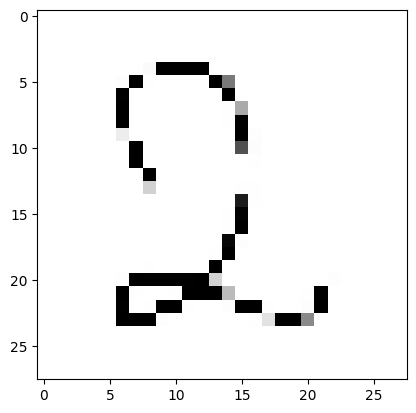

In [ ]:
# Custom test

img = cv2.imread('2.png')[:,:,0]
img = cv2.resize(img, (28, 28))
img = np.invert(np.array([img]))
prediction = model.predict(img)

print(f"This digit is likely a {np.argmax(prediction)}")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()